# Camera Manipulation

This is a notebook to demonstrate how **pypho**'s cameras can be manipulated.

Typically, you'll want to:
1. create a Camera
2. attach objects to be visualised with it
3. move the camera around
4. change its internal parameters (e.g., focal, aperture)
5. take a picture
6. and repeat some of the previous stages.

<p style="text-align:left;">
    Previous page: <a href="./03_target_objects.ipynb">Target objects</a>
    <span style="float:right;">
    This is the last page.
    </span>
</p>

In [1]:
# this is to make pypho available from the local install
import sys
sys.path.append("..")

import numpy as np
import pypho
print("Using PyPho version:", pypho.__version__)
from pypho import camera, target, graphics

Using PyPho version: 0.0.4


In [ ]:
# by default using the client side rendering is faster on binder 
# but it won't update automatically on pypho's update
# use "trame" backend if automated update is needed
import pyvista as pv
pv.set_jupyter_backend('trame') # here updates are needed 

## Camera creation

Cameras can be created either:
* from the CameraRegistry, by picking an existing camera definition with `CameraRegistry.get_camera()`.  
Note that Cameras are also mounted with a given lens, which must be specified either by its reference in the `CameraRegistry.lense_base` or emulated by specifying its focal length or range.
* by copying an existing Camera. When using `Camera.copy()`, a deep copy is performed, which means the two cameras are effectively independent, as expected.

In [3]:
# creating a camera by a full specification from the registry
## here we will get the first camera and lens ids from the registry
## but you'd want to specify the desired names instead
cam1_name = camera.CameraRegistry.camera_base.index[0]
cam1_lensname = camera.CameraRegistry.lens_base.index[0]
print("We'll load the camera with the following specifications "
      f"(camera id: {cam1_name:}, lens id: {cam1_lensname:})")
cam1 = camera.CameraRegistry.get_camera(cam_id= cam1_name, lens_id= cam1_lensname)

# note that a helper function is provided for accessing a default camera
# which does exactly the same as the previous lines
camera.get_default_camera()


We'll load the camera with the following specifications (camera id: A7RIV, lens id: FE35)


In [4]:
# Alternatively, as lenses are not always very well defined 
# at the stage of designing a photogrammetric study, it can be avoided,
# if at least the focal length or focal range,a nd the minimal focus distance, are specified instead.
cam2 = camera.CameraRegistry.get_camera(cam_id= "A7RIV", focal= 35, min_focus_distance= 0.30)
cam2

In [5]:
# finally, it might be usefull to duplicate a camera from the current settings
cam3 = cam2.copy()
# of course it makes more sense to do it after some modifications of its state

# the two cameras are effectively different entities and will move separately
print("Are the two cameras different objects? ",cam3 != cam2)

Are the two cameras different objects?  True


In [6]:
# Alternatively, a custom Camera can be created directly, provided the following minimal parameters are given
# sensor_width, sensor_height, nb_pixel_width, nb_pixel_height, and focal
camera.Camera(
    sensor_width = 23.6, sensor_height= 15.7, nb_pixel_width= 3200, nb_pixel_height= 2126,
    focal = 35
    )

## Relation to objects and visualisation

Camera only makes sense for shooting objects,  
so **pypho** provides tools for defining new objects (see [03_target_objects.ipynb](03_target_objects.ipynb)) and attaching the object ot the cameras `Camera.attach_target()`.

In [7]:
# getting the example dataset Pebble, which is ... a pebble
pebble = target.get_pebble_dataset()
# we'll move it a bit to make the example more interesting
_ = pebble.translate([1.2,1.2,0])

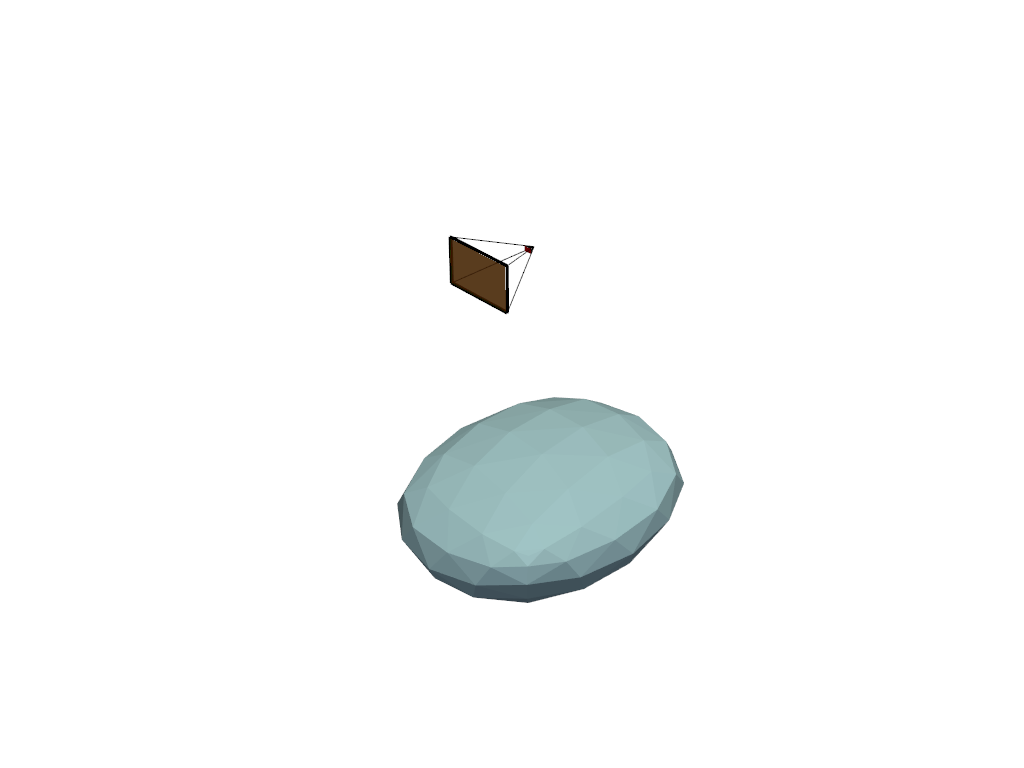

In [8]:
# We'll create a viewer to visualize the scene
viewer = graphics.Viewer3D( cameras=[cam1,cam2,cam3], objects=[pebble])
viewer.show()

In [9]:
# the object can be attached to the different cameras,
# by default they will automatically aim at the object by rotating towards its center
cam1.attach_target(pebble, focus=False)

# we can tell it to translate instead of rotating
cam2.attach_target(pebble, rotate= False, focus=False)

# or not to move at all
cam3.attach_target(pebble, aim= False, focus=False)

# to see the changes, update the viewer
viewer.update()

## Moving cameras

One of the most basic functionnality of Camera is their ability to be moved around the scene to visualise the effect of the Camera's positionning on the picture and photogrammetry results.

Cameras can be moved around in different ways:
1. updating the view parameters with `Camera.update_view()`. In this case, some parameters can be omited.
1. translating the Camera with the `Camera.move()` method, either relative to the camera orientation or as a vector of the 3D space.
1. turning the Camera, i.e., with respect to its current orientation, left, right, up, down, or rolling left or right. This is achieved with the `Camera.turn()` method.
1. moving the camera by orbiting around a given point and axis. This is achieved with the `Camera.orbit()` method and is particularly useful for the displacement you'd make to take successive pictures of an object by turning around it. Note that most objects in pypho have a .center attribute that can be used here, the target pointed by the camera is also a good candidate to turn around (default).

### update_view()

Run the following cells one by one to see the effect.

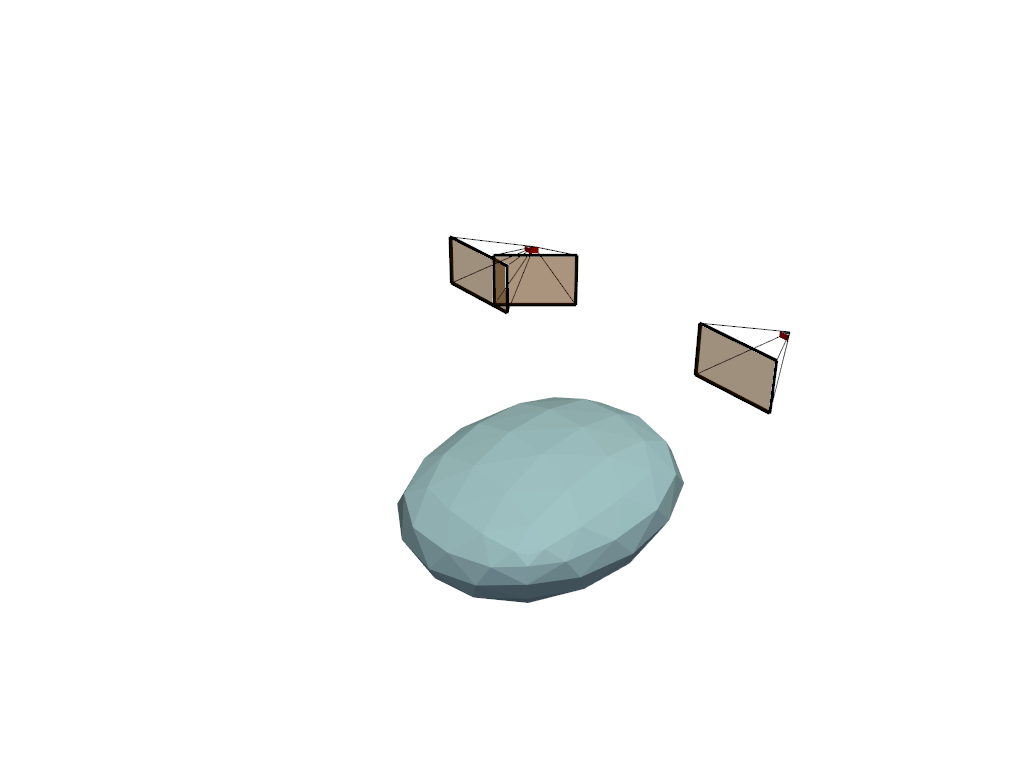

In [10]:
viewer.show()

In [11]:
cam1.update_view(location=[1,0.3,0.1])
viewer.update()

In [12]:
cam1.update_view(yaw=30)
viewer.update()

In [13]:
cam1.update_view(pitch=10)
viewer.update()

In [14]:
cam1.update_view(roll= -10)
viewer.update()

In [15]:
cam1.update_view(orientation= "portrait")
viewer.update()

### move()

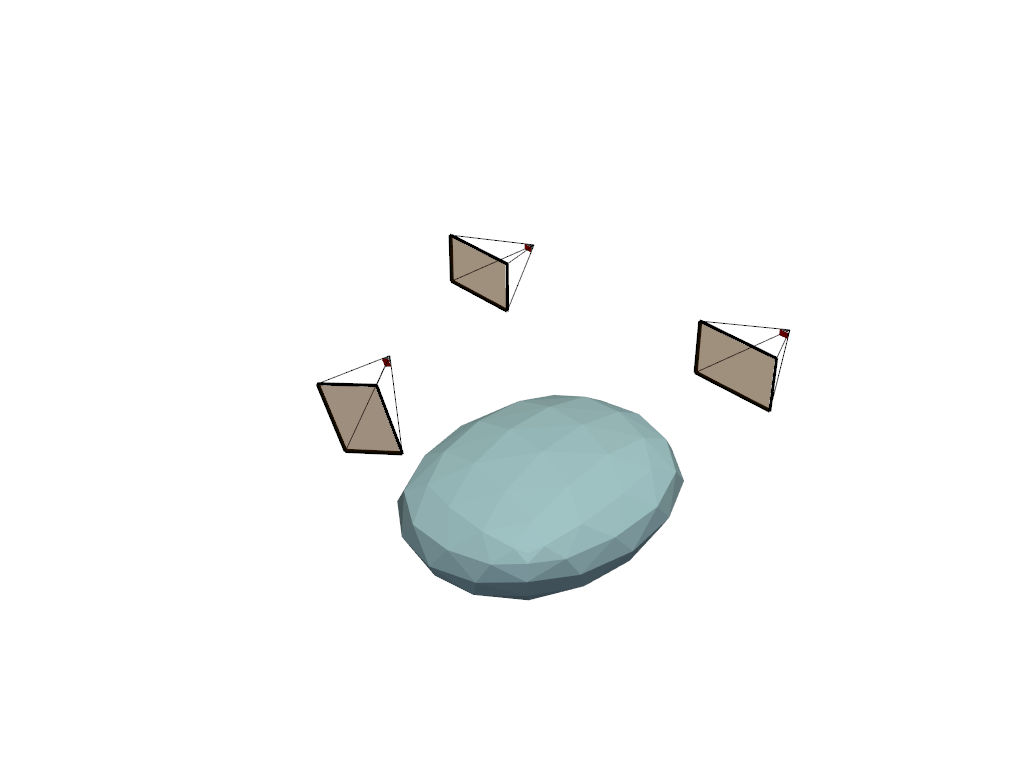

In [16]:
viewer.show()

In [17]:
cam2.move([0,0,0.3])
viewer.update()

In [18]:
cam3.move(0.5)
viewer.update()

In [19]:
cam3.move(0.5, direction= "left")
viewer.update()

In [20]:
cam3.move(0.25, direction= "right")
viewer.update()

In [21]:
cam3.move(0.25, direction= "up")
viewer.update()

In [22]:
cam3.move(0.15, direction= "down")
viewer.update()

In [23]:
cam3.move(0.25, direction= "backward")
viewer.update()

In [24]:
cam3.move(0.15, direction= "forward")
viewer.update()

### turn()

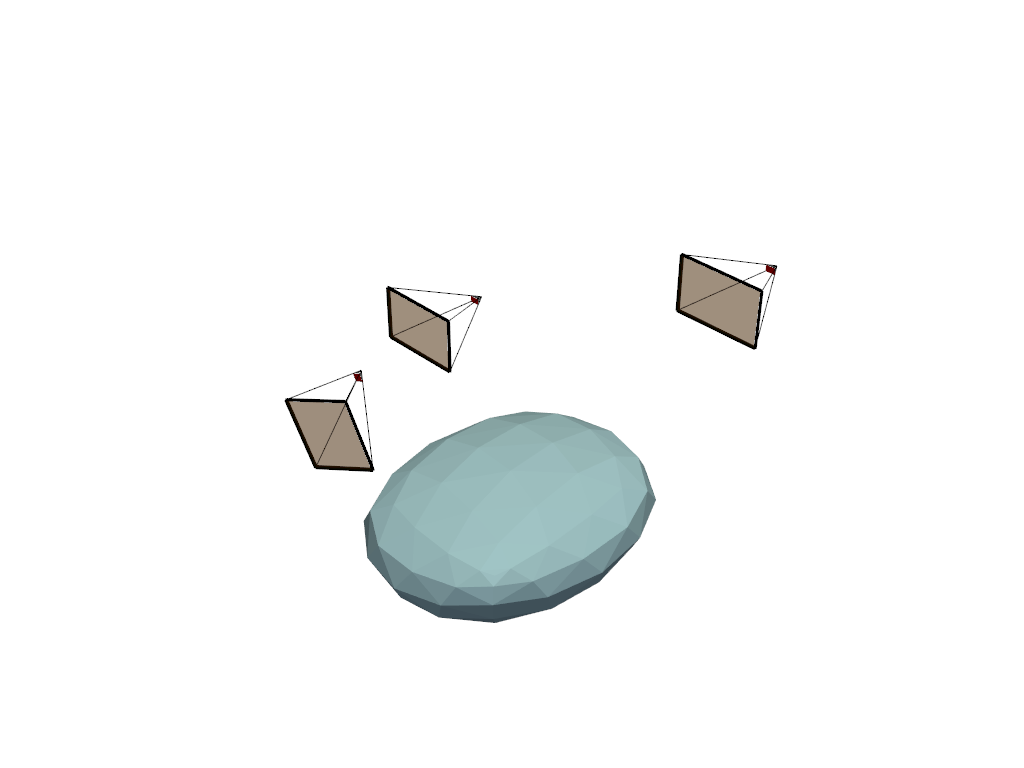

In [25]:
viewer.show()

In [26]:
cam2.turn(10)
viewer.update()

In [27]:
cam2.turn(10, direction= "left")
viewer.update()

In [28]:
cam2.turn(10, direction= "right")
viewer.update()

In [29]:
cam2.turn(10, direction= "up")
viewer.update()

In [30]:
cam2.turn(10, direction= "down")
viewer.update()

In [31]:
cam2.turn(10, direction= "roll_left")
viewer.update()

In [32]:
cam2.turn(10, direction= "roll_right")
viewer.update()

### orbit()

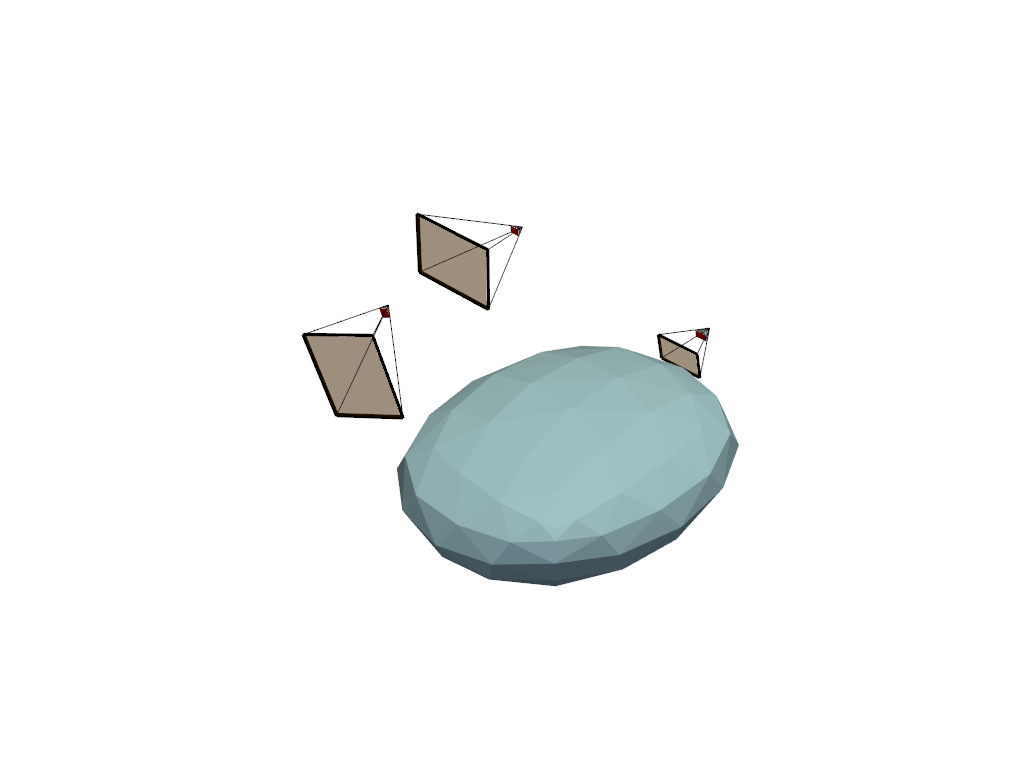

In [33]:
cam2.aim_at()
cam2.move(0.7)
cam2.focus_on()
viewer.show()

In [34]:
# orbit around the target point
cam2.orbit(10)
viewer.update()

In [35]:
# orbit around the object center
cam2.orbit(10, around= pebble)
viewer.update()

In [36]:
# orbit around a point
cam2.orbit(10, around= [0.9,1,0])
viewer.update()

In [37]:
# orbit given an axis of rotation
cam2.orbit(10, around= pebble, axis= cam2.w_vector)
viewer.update()

### Going at a given location or distance

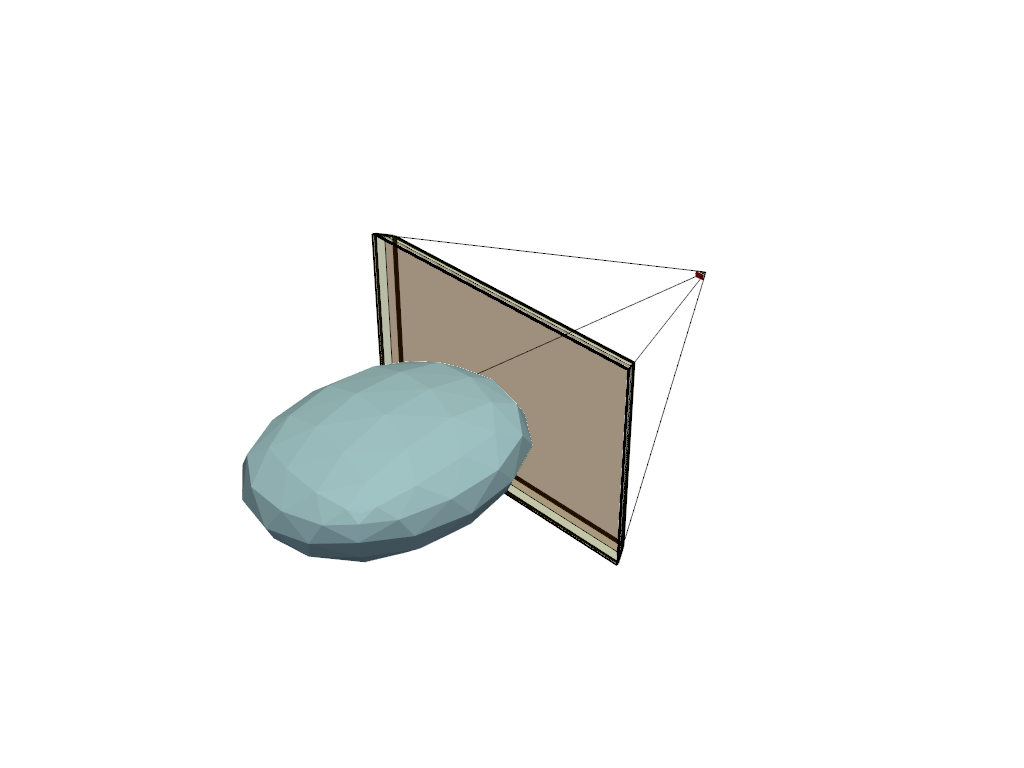

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


In [38]:
obj, cam, viewer = graphics.get_default_scene(show= False)
viewer.show(show_shots= True, show_cameras= True)
cam.trigger(add_to_viewer= False)
viewer.set_active_scalars("resolution")

In [39]:
cam.move_to(2, "distance")
viewer.update()

In [40]:
# optimize shooting distance for a given resolution
cam.move_to(12, "resolution")
viewer.update()

## Camera internals

We will now take a configuration with only one camera to illustrate the different internal state parameters that can be modified:
* **lens**: first the lens is something that can be modified on the camera and one should be mounted to fully initialise the camera. This is achieved through the `Camera.setup_lens()` method. This was covered at the stage of creating the camera and would usually not be modify after, so it is not detailed here, but know you can change the lens by setting it again with `Camera.setup_lens()`
* **focal**: `Camera.focal` represents the focal distance (distance from the sensor to the focal point). Most often in photogrammetry, you'd want to use fixed focal cameras for the stability of the photogrammetric computations, so this is automatically determined when initialising the camera from the lens database definition, or when changing the lens. However, **pypho** also offers the possibility to change the focal, for completeness and overall to make it easier to investigate the effect of a focal change without creating a new camera. This is achieved through the `Camera_update_focal()` method and will consequently update the magnification (see focus section) and the field of view, defined by the angles made by the focal point and the width/height of the sensor.
* **focus**: `Camera.focus_on()` will change the distance (from the focal point) to the focus plan, represented by `Camera.Z`, and will consequently affect the magnification and sharpness zone of the camera. Magnification is stored by `Camera.magnification` and is defined by the Z/f ratio. The sharpness zone of the camera is defined by the first and last planes that encompass the volume where an object will appear as focussed on the sensor (`Camera.Z1` and `Camera.Z2` being the distances to the first and last sharp planes respectively). This depends on the definition of the sensor and more particularly on the size of the confusion circle (`Camera.confusion_circle_diameter`), which represents diameter of the largest disk on the sensor that would be assimilated to a single point. Any sharp object that is located outside this sharpness zone will focalised  on the sensor as a spread spot larger than the confusion circle and will be viewed as blurred. To compute the sharpness zone, the camera relies on the key distance referred to as hyperfocal (`Camera.H`). When focussing at this distance, the sharpness zone will extend from half the hyperfocal to the infinity. In photogrammetry, we tend to aim at closer objects, so this trick is rarelly used, but computing the sharpness zone still rely on the hyperfocal. Finally, the total depth of the sharpness zone is stored as `Camera.depth_of_field`.
* **aperture**: last, but note the least of the parameters, the aperture of the diaphragme is key in the process of taking good pictures of an object for photogrammetry. The aperture is represented by the diameter of the diaphragme and expressed as a ratio $N$ of the focal distance $d = f/N$, therefore, the larger the aperture number $N$ is the more closed the diaphragme. The aperture has two effects: (1) it controls the amount of light that reaches the sensor and (2) it affects the sharpness zone because when the diaphragme is opened smaller, the rays of light arrive more parallel to each others and focalise in a spot that is less spread. However, further closing the diaphragm dramatically increases the effect of diffraction after a certain level of aperture. It is initially neglectible, but it can completely remove the sharpness zone if $N$ is too big. The sharpness zone including the effect of diffraction is shown in green, the zone without diffraction effect is in orange. 

Note that the question of the amount of light entering the camera, which involves the aperture but also the shutter speed and sensor sensitivity (ISO), is not considered here. Of course, it is crucial for taking good pictures, but we consider this can be achieved by adapting the ISO of the sensor and on the other hand proves difficult to predict in a reliable way through computations.

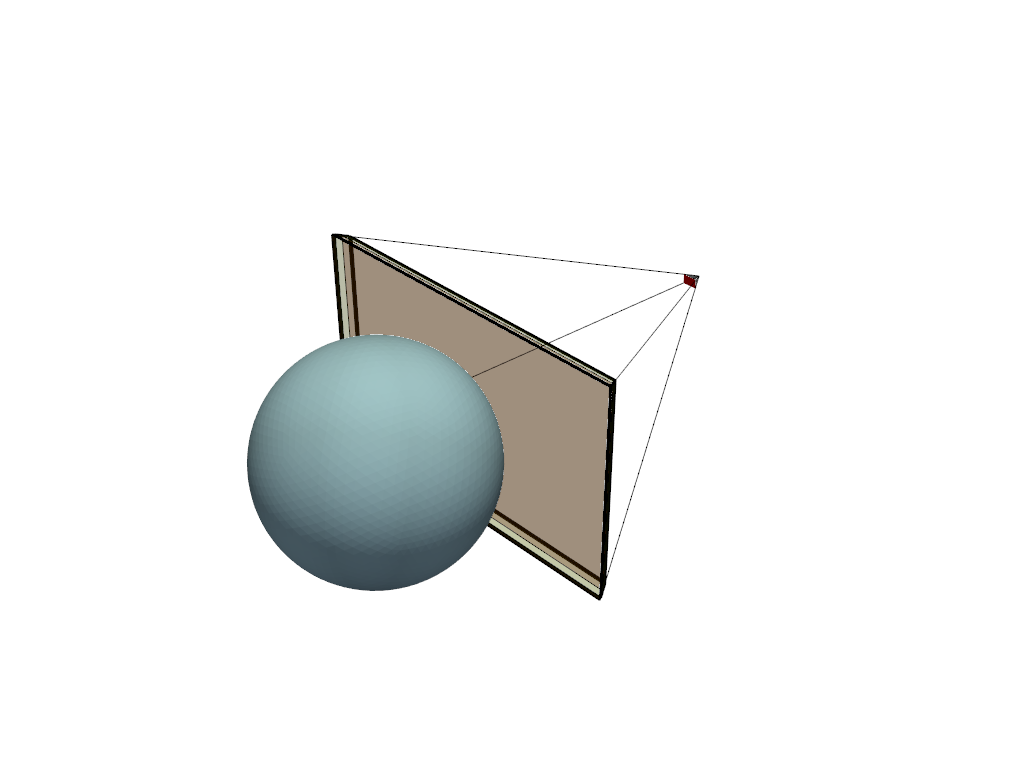

In [41]:
# lets start with a new camera and object
cam = camera.get_default_camera()
obj = target.Sphere(radius= 0.25, translation= [1,0,0])
cam.attach_target(obj, rotate=False)
viewer = graphics.Viewer3D(cam,obj, plot_sharpness_object= True, plot_sharpness_object_edges= True)
viewer.show()
viewer.plotter.camera.position = [0.7,3,0.25]
viewer.plotter.camera.focal_point = [0.7,0,0.25]
viewer.plotter.camera.up = [0,0,1]
viewer.plotter.parallel_projection = True

### Focal change

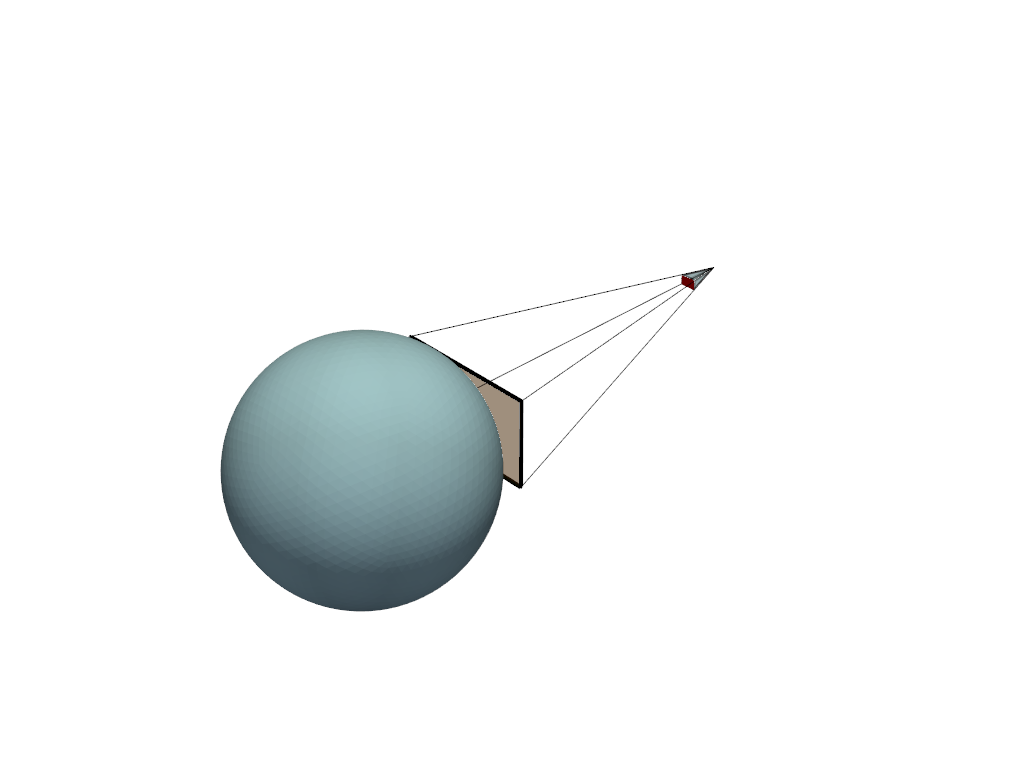

In [42]:
# first we can see how the view changes when changing the focal
# Note that the example lens is a fixed focal so we have to force this change (force=True)
cam.update_focal(90, force=True)
viewer.show()
viewer.plotter.camera.position = [0.7,3,0.25]
viewer.plotter.camera.focal_point = [0.7,0,0.25]
viewer.plotter.camera.up = [0,0,1]
viewer.plotter.parallel_projection = True

In [43]:
# To avoid forcing the focal change, we could change the lense for a variable focal one
cam.setup_lens(lens_id=None, min_focus_distance=0.3, focal_min=35, focal_max=150)
cam.update_focal(100)
cam.focus_on()
viewer.update()

In [44]:
# let's put back the initial lens
cam.setup_lens(lens_id= camera.CameraRegistry.lens_base.index[0])
cam.focus_on()
viewer.update()

### Focus change

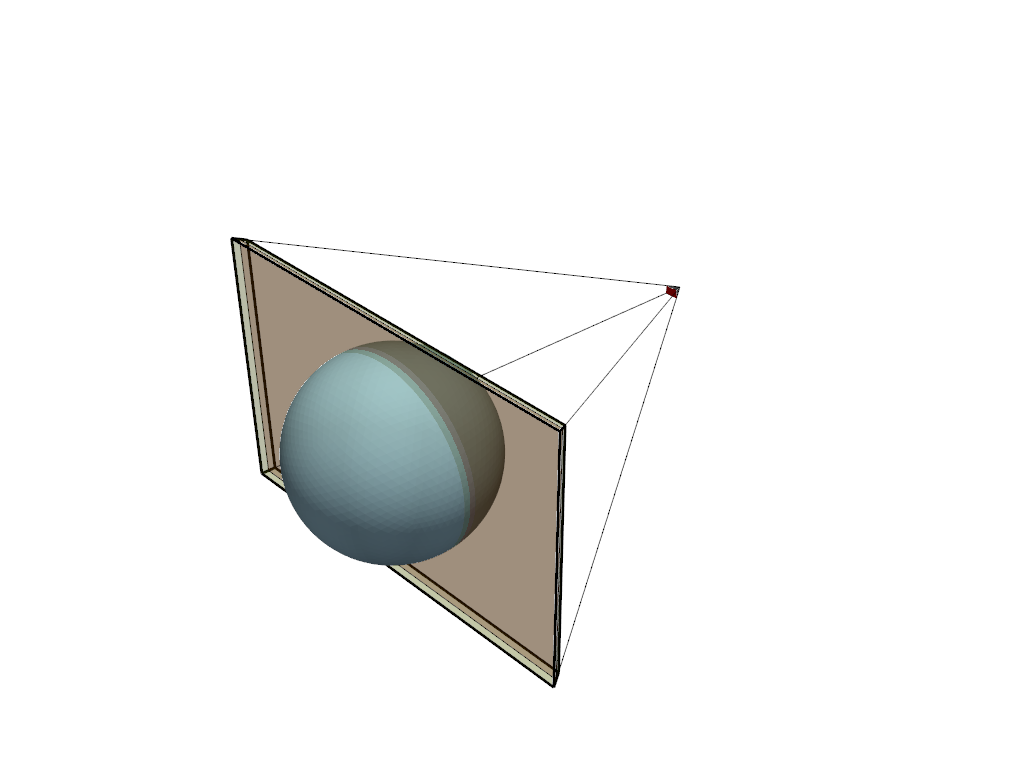

In [45]:
# We can change where the camera is focussed on
# either giving it a single point
cam.focus_on(obj.center)
viewer.show()
viewer.plotter.camera.position = [0.7,3,0.25]
viewer.plotter.camera.focal_point = [0.7,0,0.25]
viewer.plotter.camera.up = [0,0,1]
viewer.plotter.parallel_projection = True

In [46]:
# ... or a series of points,
# by default the nearest is taken
cam.focus_on(obj.points)
viewer.update()

In [47]:
# ... but we can also change this and specify 
# how to define a location to focus on base on the passed points
# by giving it the method
cam.focus_on(obj.points, method= np.max)
viewer.update()

In [48]:
# alternatively a pyvista object can be given directly and its points will be used
cam.focus_on(obj.bounding_box())
viewer.update()

### Aperture Change

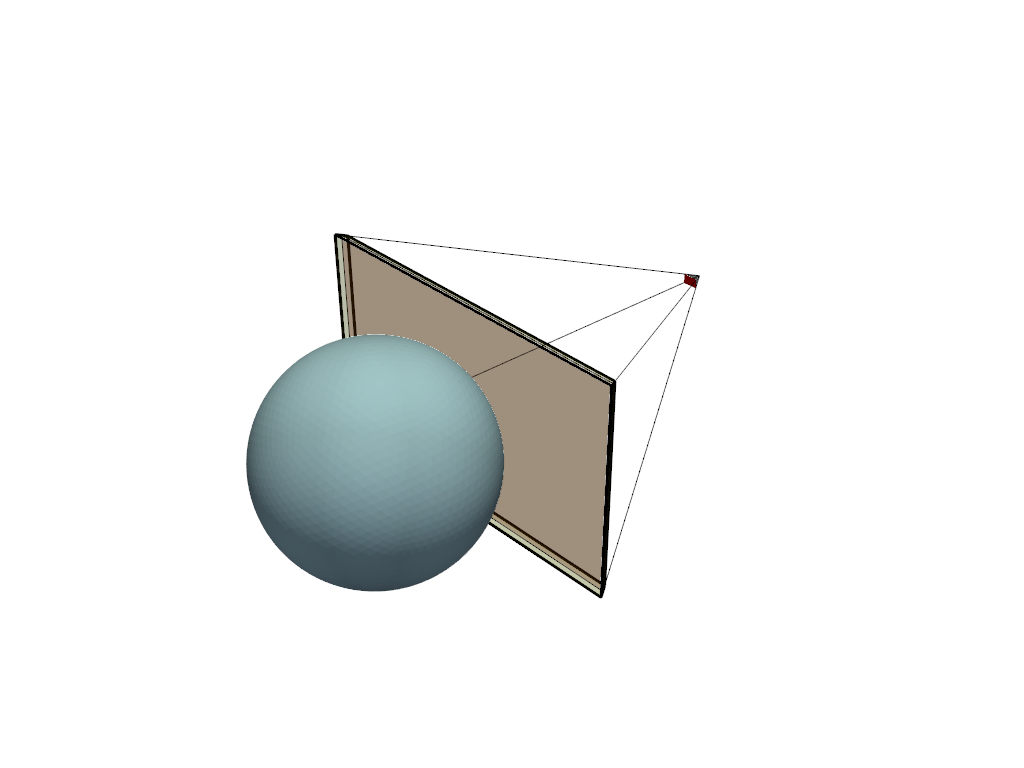

In [49]:
# the aperture can also be modified and will mainly affect the sharpness zone
cam.update_aperture(N= 4)
viewer.show()
viewer.plotter.camera.position = [0.7,3,0.25]
viewer.plotter.camera.focal_point = [0.7,0,0.25]
viewer.plotter.camera.up = [0,0,1]
viewer.plotter.parallel_projection = True

In [50]:
cam.update_aperture(N= 8)
viewer.update()

Note that the green zone is where the image is sharp and the orange one is where it would be sharp without the effect of diffraction.

## Optimizing the camera parameters

This is work in progress. In the future there will be:
* optimisation of Z for a given resolution
* optimisation of the focus to place as much as possible of the target in the sharpness zone
* optimisation of the aperture likewise

### Optimize distance to get a given resolution

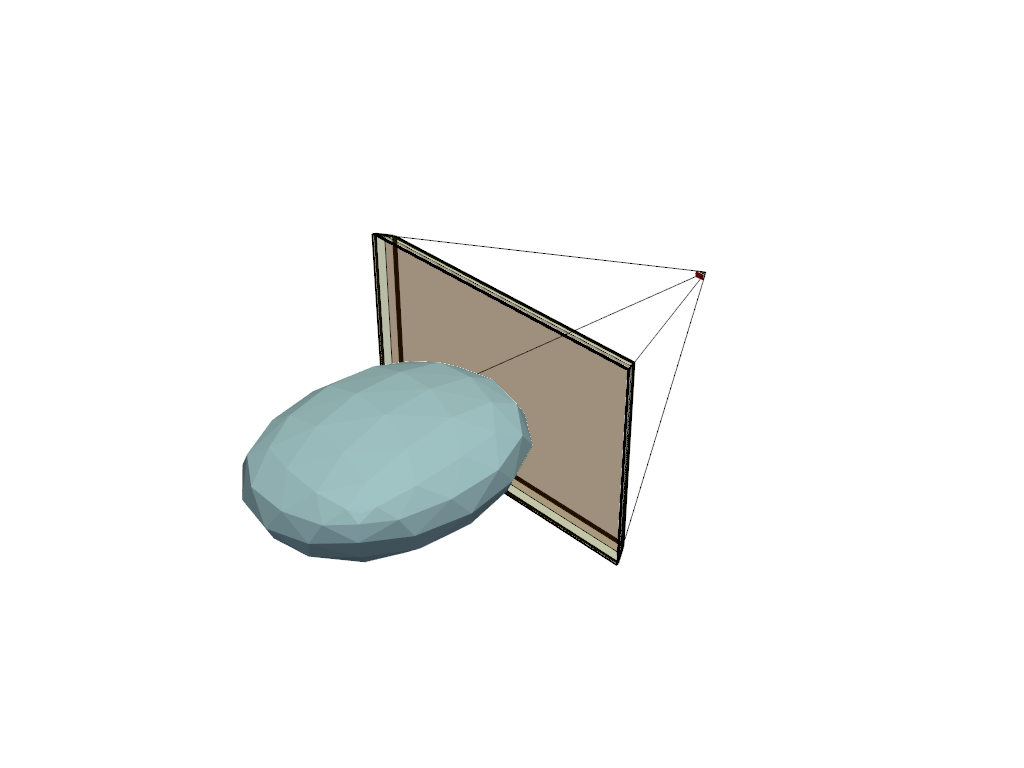

In [51]:
obj, cam, viewer = graphics.get_default_scene()
viewer.set_active_scalars("resolution")

In [52]:
target_resolution = 6 # pix/mm

cam.move_to(target_resolution, mode="resolution")

cam.update_aperture()
viewer.update(update_active_scalars=True)


### Optimise aperture

In [53]:
# using a large aperture number makes the sharpness zone larger (orange)
# but diffraction becomes predominant and the really sharp zone disapears(green)
cam.update_aperture(22)
viewer.set_active_scalars("blur_spot_diameter")
viewer.update()
print("N:",cam.N)
print("Depth of field with diffraction: {:.2f} cm".format(100 * cam.depth_of_field_diffraction_included))

N: 22
Depth of field with diffraction: 0.00 cm


In [54]:
# the optimal N considering diffraction can be accessed as follows
N_optim = cam.compute_optimal_aperture()
cam.update_aperture(N_optim)
viewer.update()
print("N:",cam.N)
print("Depth of field with diffraction: {:.2f} cm".format(100 * cam.depth_of_field_diffraction_included))

N: 6.35
Depth of field with diffraction: 13.31 cm


In [55]:
# when focusing on a new target point, aperture is not changed by default
cam.update_aperture(1.4)
cam.focus_on(obj.center)
viewer.update()
print("N:",cam.N)
print("Depth of field with diffraction: {:.2f} cm".format(100 * cam.depth_of_field_diffraction_included))

N: 1.4
Depth of field with diffraction: 6.71 cm


In [56]:
# but it can be optimized with the optional optim_N
cam.focus_on(obj.center, optimize_N=True)
viewer.update()
print("N:",cam.N)
print("Depth of field with diffraction: {:.2f} cm".format(100 * cam.depth_of_field_diffraction_included))

N: 6.35
Depth of field with diffraction: 22.24 cm


## Optimizing sharpness zone

For photogrammetry, the object must be as sharp as possible,
ideally in all its visible parts, or at least in the closest part of the object.

This can be optimized under different conditions.

The result of this optimisation is shown in the graph below.

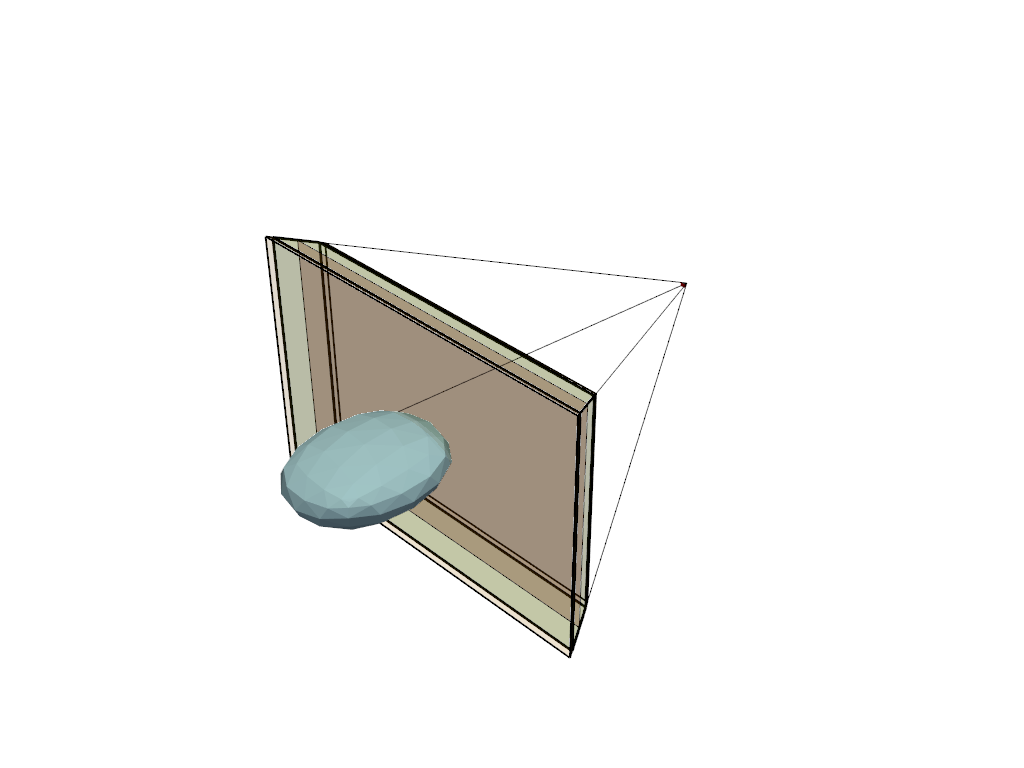

In [57]:
obj, cam, viewer = graphics.get_default_scene(dist= 2)

obj.subdivide(1, "linear", inplace= True)
cam._update_object_view_properties(obj)
viewer.update()

viewer.set_active_scalars("blur_spot_diameter")
facing = obj.point_data["facing_b"]
target_points = obj.points[facing]

target_zx = cam._compute_camera_coordinates(target_points)[:,0]

In [58]:
# ignoring diffraction, make the closest target points sharp
res = cam.optimize_sharpness(target_points= target_points, 
        use_diffraction= False, mode= "front"
        )
viewer.update()

In [59]:
# ignoring diffraction, balance the sharpness zone and optimize the aperture
res = cam.optimize_sharpness(target_points= target_points, 
        use_diffraction= False, mode= "middle", optimize_N= True
        )
viewer.update()

In [60]:
# considering diffraction, balance the sharpness zone and optimize the aperture
# but don't move the camera, this is limitting the sharpness
res = cam.optimize_sharpness(target_points= target_points, 
        use_diffraction= True, mode= "middle", optimize_N= True
        )
viewer.update()

In [61]:
# considering diffraction, balance the sharpness zone and optimize the aperture
# allow moving the camera to make a larger sharpness zone
# this is also longer to compute
res = cam.optimize_sharpness(target_points= target_points, 
        use_diffraction= True, mode= "middle", optimize_N= True,
        optimize_location= True
        )
viewer.update()

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


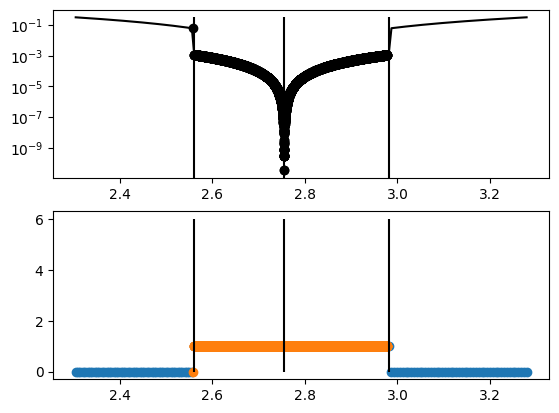

In [62]:
# we can plot the location of the target points and associated cost
# to inspect optimization results
# the options must be the same as for the optimisation method
graphics.plot_sharpness_optimisation(cam, target_points= target_points, res=res, 
        use_diffraction= True, mode= "middle", optimize_N= True,
        optimize_location= True
        )

In [63]:
# finally this is showing the optimisation resulting cost
graphics.plot_sharpness_optimisation_cost(
    cam= cam, target_points= target_points, res= res,
        use_diffraction= True, mode= "middle", optimize_N= True,
        optimize_location= True
)

AxisError: axis 50 is out of bounds for array of dimension 1

## Taking a picture

The purpose of Cameras is to take pictures (aka. shots). 
Most parameters can be explored as demonstrated above by modify the camera settings and inspecting the effect on the view object directly, but you want to start and investigate varying the parameters and viewpoints, you might want to actually take the pictures and compare them.

Taking a picture is achieved through the `Camera.trigger()` method 
and generates a `CameraShot` which is a duplicate of the camera state when the shot is taken.

The camera holds a list of the pictures it took in the form of `Camera.shots` parameters.

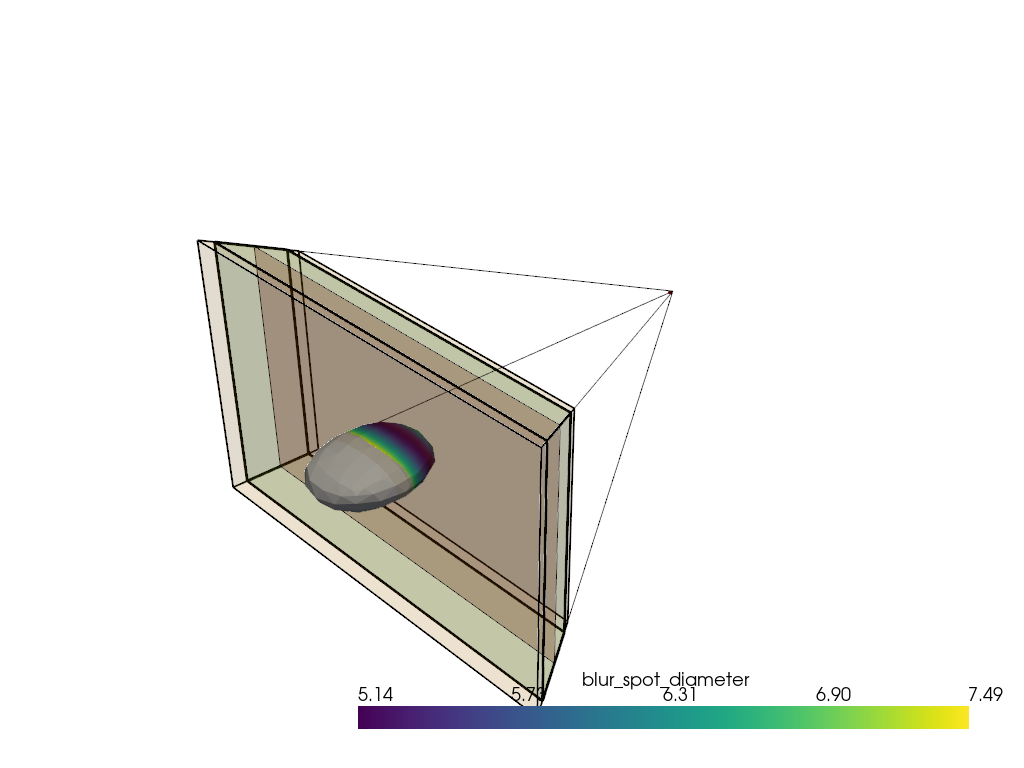

In [64]:
viewer = graphics.Viewer3D(cam,obj)
viewer.show()

In [65]:

viewer.add_shot(cam.trigger())
viewer.show(show_objects= False)

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6146 and the array at index 1 has size 24578

## Planning a shot sequence

With this tools you can visualisation the configuration of a shot sequence.

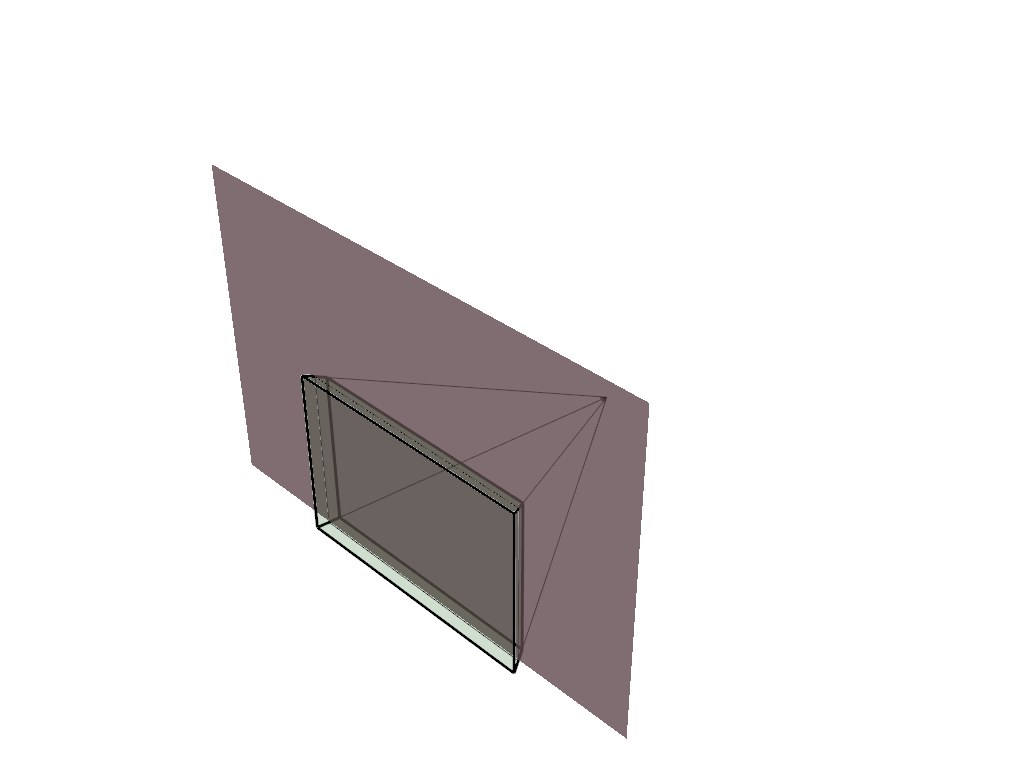

In [66]:
# We'll consider a vertical outcrop located 1.5 m away
outcrop = target.Outcrop(translation= [1.5,0,0])

# We take our preferred camera and place it at 50 cm elevation
cam = camera.get_default_camera()
cam.move([0,0,0.5])
# and aim at the outcrop
cam.attach_target(outcrop, aim=False, focus= True)

# and view the scene
viewer = graphics.Viewer3D(cam, outcrop,
                           target_object_opacity=0.5,
                           plot_focus_plan_object= False,
                           plot_sharpness_object= False,
                           plot_sharpness_object_edges= False
                           )
viewer.show()
viewer.plotter.camera.position = [-5,-5,2.5]
viewer.plotter.camera.focal_point = [1.4,0.2,0.7]
viewer.plotter.camera.up = [0,0,1]

In [67]:
angle = 25
shift = 0.4

cam.trigger()
cam.turn(angle, "left")
cam.trigger()
cam.turn(2*angle, "right")
cam.trigger()

cam.turn(angle, "left")
cam.move([0,0,shift])
cam.trigger()
cam.turn(angle, "left")
cam.trigger()
cam.turn(2*angle, "right")
cam.trigger()

cam.turn(angle, "left")
cam.move([0,0,shift])
cam.trigger()
cam.turn(angle, "left")
cam.trigger()
cam.turn(2*angle, "right")
cam.trigger()
cam.turn(angle, "left")

viewer.add_shot(cam.shots)
viewer.show(show_cameras= False)
viewer.plotter.camera.position = [-5,-5,2.5]
viewer.plotter.camera.focal_point = [1.4,0.2,0.7]
viewer.plotter.camera.up = [0,0,1]

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


KeyError: 'plot_camera_orientation'

## Counting views

In a photogrammetric design, it is crucial to evaluate how each part of the target object is going to be documented. Quantifying the number of potential views for each point is also a way to evaluate a posteriori the quality of the reconstruction by comparing how the number of expected views and the number of pictures used in the reconstruction of each model point.

Pypho provides two tools for this:
1. a scalar field is incremented each time a picture is taken: `object.point_data["nb_views"]`
2. each camera stores a view counter for each attached object `Camera.views`. It takes the form of a dictionnary associating a boolean array to each attached object. The lines of the array are for each shot, the column for each data point. This can be visualised by `graphics.plot_view_matrix`

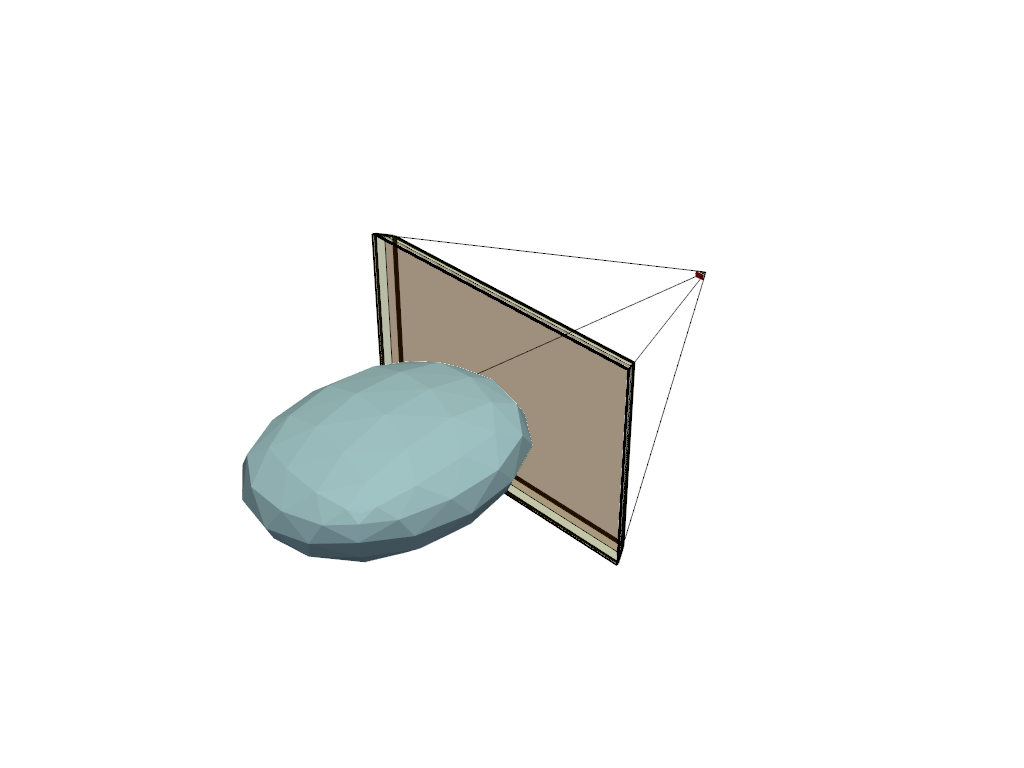

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


In [68]:
obj, cam, viewer = graphics.get_default_scene(show= False)
viewer.show(show_shots= True, show_cameras= True)
cam.trigger(add_to_viewer= False)
viewer.set_active_scalars("nb_views")

In [69]:
n_step = 30
for i in range(n_step):
    cam.orbit(360/n_step, obj.center)
    cam.trigger(add_to_viewer= True)
viewer.update()

viewer.plot_shots()

KeyError: 'plot_camera_orientation'

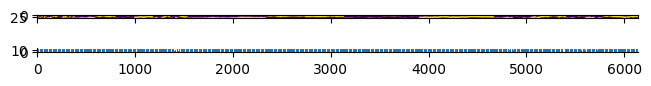

In [70]:

graphics.plot_view_matrix(cam)

## Accessible properties

C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:2017: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  self._update_rotation_from_vectors()
C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:1873: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  self.aim_at(target= target, **kargs)
C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:543: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_sqr)


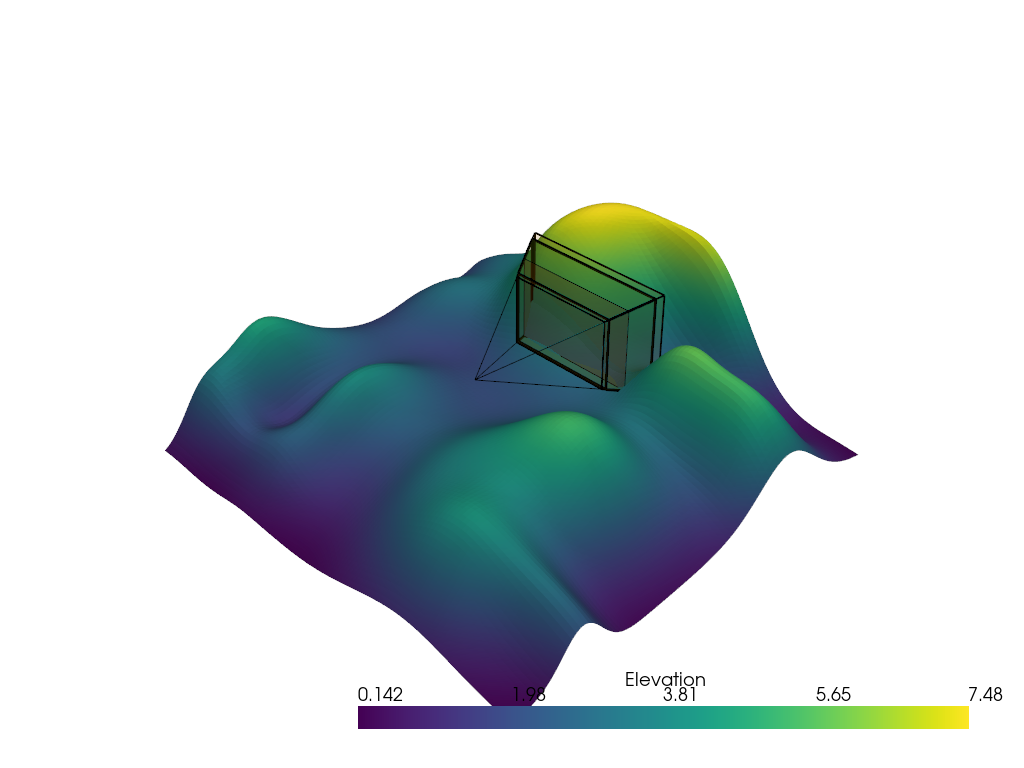

In [71]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills(), kind="Ground")
cam = camera.get_default_camera()
cam.init_location(hills)
cam.attach_target(hills)
cam.update_view([2,10,5],180,0,0)
cam.focus_on()

viewer = graphics.Viewer3D(cameras=cam, objects=hills)
viewer.show()

In [72]:
viewer.set_active_scalars("z_all")

In [73]:
viewer.set_active_scalars("sampling_distance")

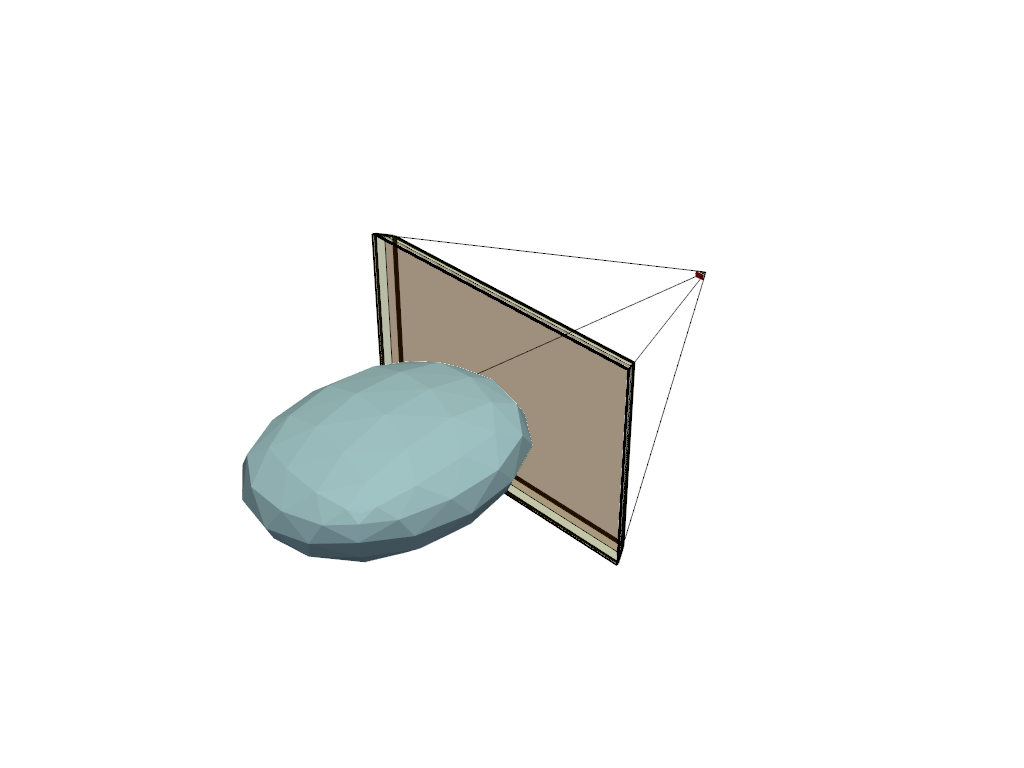

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


In [74]:
obj, cam, viewer = graphics.get_default_scene(show= False)
viewer.show(show_shots= True, show_cameras= True)
cam.move_to(2.5, "distance")
cam.trigger(add_to_viewer= False)
viewer.set_active_scalars("nb_views")

In [75]:
cam.orbit(20)
cam.trigger(add_to_viewer= False)
viewer.update()
print(np.nanmin(obj.point_data["best_blur_diameter"]), np.nanmax(obj.point_data["best_blur_diameter"]))

4.587627058560001 13.47696607989967


In [76]:
viewer.set_active_scalars("nb_sharp_views")

In [77]:
viewer.set_active_scalars("best_resolution")

In [78]:
viewer.set_active_scalars("best_sampling")

In [79]:
np.nanmin(obj.point_data["best_blur_diameter"])

np.float64(4.587627058560001)

In [80]:
viewer.set_active_scalars("best_blur_diameter",
    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, field="best_blur_diameter")
)

In [81]:
viewer.set_active_scalars("best_defocus_diameter")

In [82]:
obj

TargetObject (0x1e279281c00)
  N Cells:    12288
  N Points:   6146
  N Strips:   0
  X Bounds:   -4.477e-01, 4.477e-01
  Y Bounds:   -3.582e-01, 3.582e-01
  Z Bounds:   0.000e+00, 3.134e-01
  N Arrays:   46

## Custom colormaps

Custom colormaps have been defined for the blur diameters.

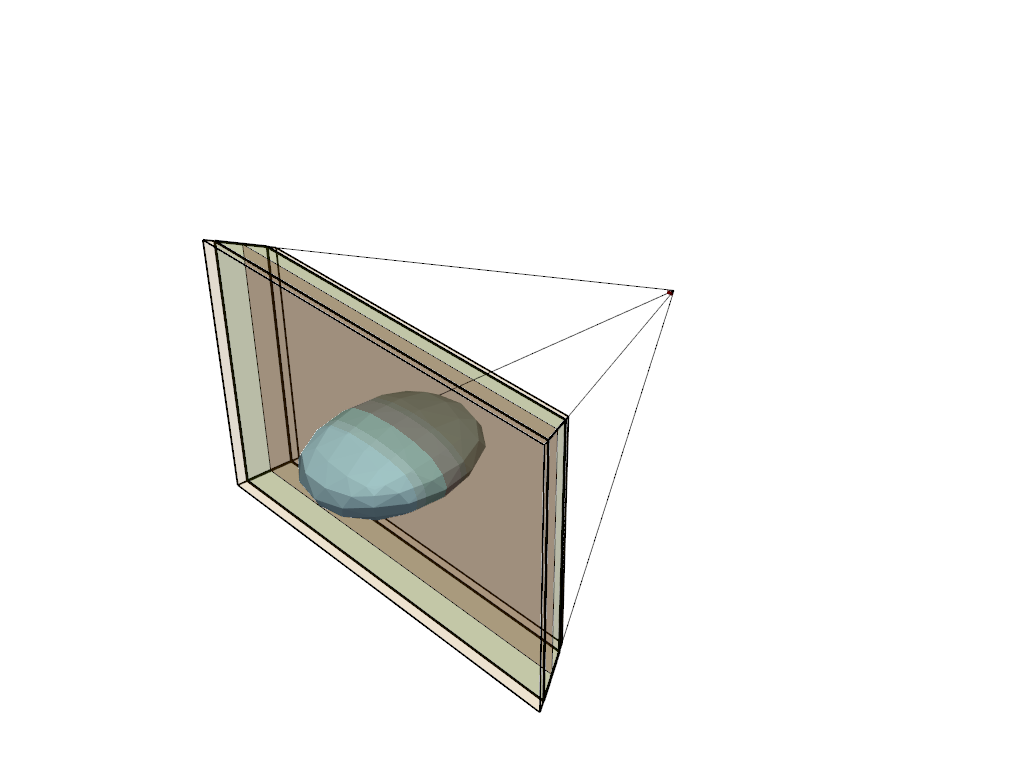

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\pyvista\core\filters\poly_data.py:2958: PyVistaDeprecationWarning: `flip_normals` is deprecated. Use `flip_faces` instead. Note that `inplace` is now `False` by default for the new filter.
  warnings.warn(


In [91]:
obj, cam, viewer = graphics.get_default_scene(show= False)
cam.move_to(1.5, "distance")
cam.update_aperture()
cam.focus_on(obj.center)
viewer.show(show_shots= True, show_cameras= True)
cam.trigger(add_to_viewer= False)


In [ ]:
# setting the colormap to show the blur spot (total including diffraction)
# the white fringe locates the confusion circle diameter
viewer.set_active_scalars("blur_spot_diameter",
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj)
                )

In [87]:
# setting the colormap to show the defocus diameter only (no diffraction)
# here vmin is used to force the colormap to start at 0
# be careful to use the same vmin in both the set_active_scalars and Cmap values
viewer.set_active_scalars("defocus_diameter", vmin=0,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, 
                                                            vmin=0, field= "defocus_diameter")
                )

In [88]:
# this is automatically updated with the viewer
cam.move_to(3, "distance", target= obj.center)
viewer.update()